In [1]:
import csv
import cv2
import numpy as np
from scipy import ndimage
import scipy.misc
import matplotlib.pyplot as plt

In [3]:
driving_log = []

with open('./Data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        driving_log.append(line)
        
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(driving_log, test_size=0.2)

print(len(train_samples),len(validation_samples))
        
print(len(driving_log))

2238 560
2798


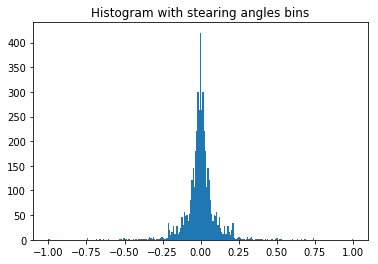

In [11]:
images = []
images_flipped = []
measurements = []
measurements_flipped = []

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            measurement = []
            for batch_sample in batch_samples:
                filename = source_path.split('/')[-1]
                current_path = './Data/IMG/' + filename
                image = cv2.imread(current_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                measurement = float(driving_log[3])
                
                images.append(image)
                measurements.append(measurement)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)


a = np.hstack(y_train)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with stearing angles bins")
plt.show()

In [14]:
batch_size = 32

train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)

TypeError: object of type 'generator' has no len()

In [19]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers import Convolution2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from time import time
from sklearn.utils import shuffle
import math

X_train, y_train = shuffle(X_train, y_train)


model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(24, (5,5),strides=(2,2),activation="relu"))
model.add(Convolution2D(36, (5,5),strides=(2,2),activation="relu"))
model.add(Convolution2D(48, (5,5),strides=(2,2),activation="relu"))
model.add(Convolution2D(64, (3,3),activation="relu"))
model.add(Convolution2D(64, (3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')


model.fit_generator(train_generator, \
            steps_per_epoch=len(train_samples)/batch_size, \
            validation_data=validation_generator, \
            validation_steps=len(validation_samples)/batch_size, \
            epochs=5, verbose=0)

model.save('model.h5')

StopIteration: 